# Sentiment Analysis With Transformers
**Name:** Tarun Kumar Reddy

In [23]:
!!pip install -q rouge-score
!!pip install -q git+https://github.com/keras-team/keras-nlp.git --upgrade

['  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/950.8 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b307.2/950.8 kB\x1b \x1b9.1 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b950.8/950.8 kB\x1b \x1b17.2 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25h\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/6.5 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b6.5/6.5 MB\x1b \x1b207.9 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b6.5/6.5 MB\x1b \x1b107.1 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25h  Building wheel for ker

## Import Required Libraries

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_nlp

Using TensorFlow backend


## Loading Data

In [27]:
vocab_size = 20000
maxlen = 150

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


## Building Architecture

In [29]:
embed_dim = 256
num_heads = 8
ff_dim = 32
intermediate_dim =512
num_layers = 3

In [31]:
input_ = keras.Input(shape=(None,), dtype="int32")

x = keras_nlp.layers.TokenAndPositionEmbedding(vocabulary_size=vocab_size,
                                               sequence_length=maxlen,
                                               embedding_dim = embed_dim,
                                               mask_zero=True,)(input_)


for _ in range(num_layers):
  encoder_layer = keras_nlp.layers.TransformerEncoder(num_heads= num_heads,
                                                      intermediate_dim=intermediate_dim,)
  x = encoder_layer(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(rate=0.2) (x)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dense(20, activation="relu")(x)

output_ = layers.Dense(2, activation="softmax")(x)

model = keras.Model(input_, output_)


In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 token_and_position_embeddi  (None, None, 256)         5158400   
 ng_2 (TokenAndPositionEmbe                                      
 dding)                                                          
                                                                 
 transformer_encoder (Trans  (None, None, 256)         527104    
 formerEncoder)                                                  
                                                                 
 transformer_encoder_1 (Tra  (None, None, 256)         527104    
 nsformerEncoder)                                                
                                                                 
 transformer_encoder_2 (Tra  (None, None, 256)         5271

## Training the model

In [33]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 88s 100ms/step - loss: 0.6960 - accuracy: 0.5049 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
782/782 [==============================] - 57s 73ms/step - loss: 0.6934 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
782/782 [==============================] - 55s 71ms/step - loss: 0.6934 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
782/782 [==============================] - 46s 59ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
782/782 [==============================] - 46s 59ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.5000


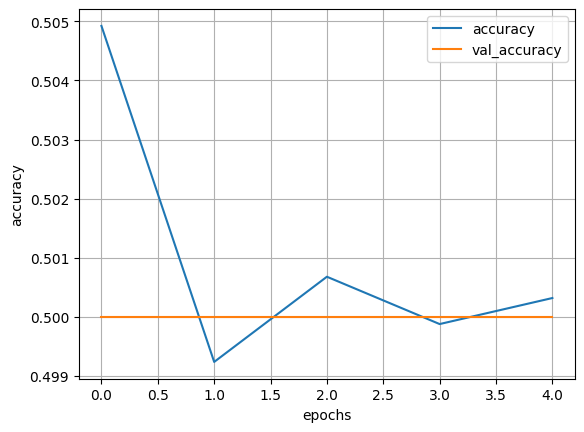

In [34]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

## Evaluating the model using "Precision", "Recall" and "F1-score"

782/782 [==============================] - 16s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier <keras.src.engine.functional.Functional object at 0x7d1afd441720>:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12500
           1       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000




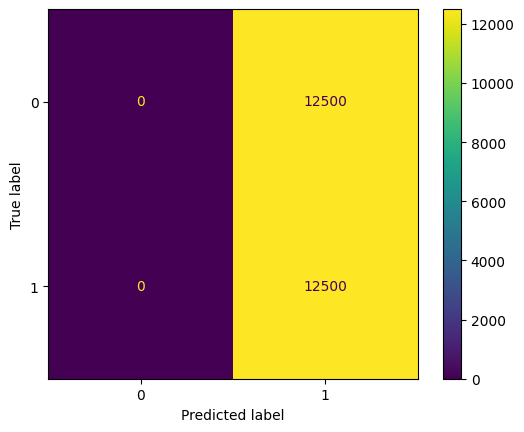

In [35]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = np.argmax(model.predict(x_val), axis=1)


print("Classification report for classifier %s:\n%s\n"
% (model, metrics.classification_report(y_val, y_pred)))

confMatrix = confusion_matrix(y_true = y_val, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()